In [190]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

(A) Load the Breast cancer data using sklearn.datasets.load breast cancer.

In [72]:
df = datasets.load_breast_cancer()

(B) Print out the names of the features (X) and the name of the target (y).

In [75]:
X = df.data
y = df.target

print("Feature names:", df.feature_names)
print("Target name:", df.target_names)

Feature names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Target name: ['malignant' 'benign']


(C) Allocate the half of the data to Train (X train, y train) and the re-
maining half to Test (X test, y test).

In [39]:
X_train, X_test, y_train, y_test = train_test_split(df.data, df.target, test_size=0.5, random_state=42)

(F) Use the 'entropy' index as the criterion and fix the maximum depth of trees as 2.

In [41]:
dt_params = {'criterion': 'entropy', 'max_depth': 2}

(G) Write a program that generates a decision tree from X_train, y_train
and predict _ pred from _ test. You can compute accuracy of the classifier by
compang y_pred d and_y test. Please print out the accuracy and the confusion
matrix.

In [43]:
decision_tree = DecisionTreeClassifier(**dt_params)
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)
print("Decision Tree Confusion Matrix:\n", conf_matrix_dt)

Decision Tree Accuracy: 0.9368421052631579
Decision Tree Confusion Matrix:
 [[ 88  10]
 [  8 179]]


(H) Visualize the tree using sklearn.tree.plot_tree. Each node of trees
should include feature name.

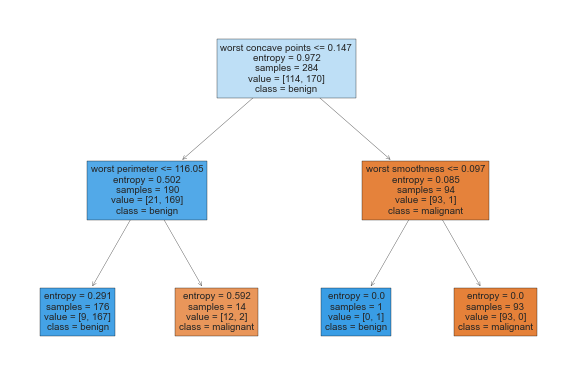

In [184]:
plot_tree(decision_tree, feature_names=df.feature_names, class_names = df.target_names, filled=True)
plt.style.use('seaborn-v0_8')

(I) Similarly, write a program that generates multiple decision trees using
the bagging. This method should record its prediction accuracy at bagging score
by varying the parameter_n estimators. Draw a 2D line plot whose X-axis is_
n estimators and Y-axis bagging score, and the plot should have more than 20
data points of different X-axis values.

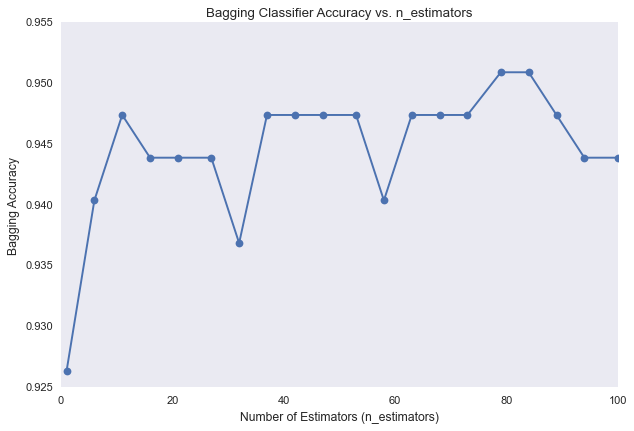

In [214]:
n_estimators_range = np.linspace(1, 100, 20, dtype=int)
bagging_scores = []

for n_estimators in n_estimators_range:
    bagging = BaggingClassifier(n_estimators=n_estimators, random_state=42)
    bagging.fit(X_train, y_train)
    y_pred_bagging = bagging.predict(X_test)
    bagging_scores.append(accuracy_score(y_test, y_pred_bagging))

plt.figure()
plt.plot(n_estimators_range, bagging_scores, marker='o')
plt.xlabel('Number of Estimators (n_estimators)')
plt.ylabel('Bagging Accuracy')
plt.title('Bagging Classifier Accuracy vs. n_estimators')
plt.grid()
plt.show()

(J) Similarly, write a program that generates multiple decision trees using
the AdaBoost. Draw a 2D line plot whose X-axis is n_estimators and Y-axis
boost score, and the plot should have more than 20 data points of different X-axis
values.

C:\Users\mattc\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\mattc\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\mattc\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\mattc\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\mat

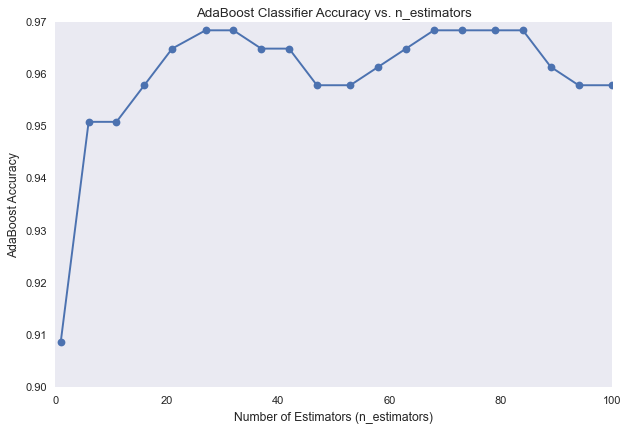

In [216]:
boost_scores = []

for n_estimators in n_estimators_range:
    adaboost = AdaBoostClassifier(n_estimators=n_estimators, random_state=42)
    adaboost.fit(X_train, y_train)
    y_pred_adaboost = adaboost.predict(X_test)
    boost_scores.append(accuracy_score(y_test, y_pred_adaboost))

plt.figure()
plt.plot(n_estimators_range, boost_scores, marker='o')
plt.xlabel('Number of Estimators (n_estimators)')
plt.ylabel('AdaBoost Accuracy')
plt.title('AdaBoost Classifier Accuracy vs. n_estimators')
plt.grid()
plt.show()

(K) Similarly, write a program that generates multiple decision trees using
the random forest. Fix _ estimators=100, and draw a 2D line plot whose X-axis is
m_x features and Y-axis forest score. The plot should have more than 20 data
points of different pair of X-axis val.ues

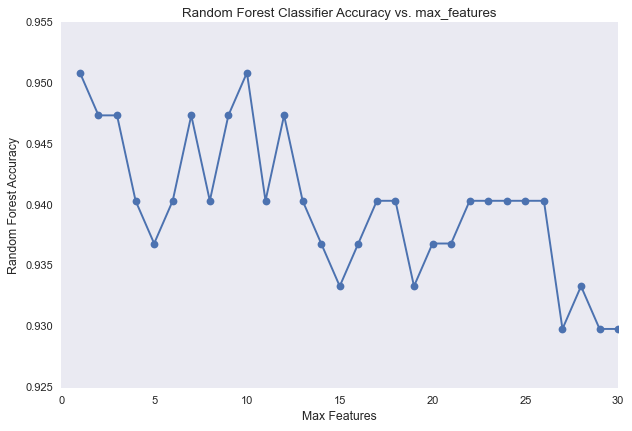

In [212]:
max_features_range = range(1, df.data.shape[1]+1)
forest_scores = []

for max_features in max_features_range:
    random_forest = RandomForestClassifier(n_estimators=100, max_features=max_features, random_state=42, max_depth=2)
    random_forest.fit(X_train, y_train)
    y_pred_forest = random_forest.predict(X_test)
    forest_scores.append(accuracy_score(y_test, y_pred_forest))

plt.figure()
plt.plot(max_features_range, forest_scores, marker='o')
plt.xlabel('Max Features')
plt.ylabel('Random Forest Accuracy')
plt.title('Random Forest Classifier Accuracy vs. max_features')
plt.grid()
plt.show()

v.v